In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [8]:
# Load dataset
file_path ="/content/Mall_Customers.csv"   # Change the path if needed
df = pd.read_csv(file_path)

In [10]:
# Display first few rows
print("First 5 rows of dataset:\n", df.head())


First 5 rows of dataset:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
print("\n🔹 Summary Statistics:")
print(df.describe(include='all'))  # Includes mean, std, min, max, etc.

# Compute additional statistics manually
summary_stats = pd.DataFrame()
summary_stats["Min"] = df.min(numeric_only=True)
summary_stats["Max"] = df.max(numeric_only=True)
summary_stats["Mean"] = df.mean(numeric_only=True)
summary_stats["Range"] = df.max(numeric_only=True) - df.min(numeric_only=True)
summary_stats["Standard Deviation"] = df.std(numeric_only=True)
summary_stats["Variance"] = df.var(numeric_only=True)
summary_stats["25th Percentile"] = df.quantile(0.25, numeric_only=True)
summary_stats["50th Percentile (Median)"] = df.quantile(0.50, numeric_only=True)
summary_stats["75th Percentile"] = df.quantile(0.75, numeric_only=True)

print("\n🔹 Detailed Summary Statistics:\n", summary_stats)


🔹 Summary Statistics:
        CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
m

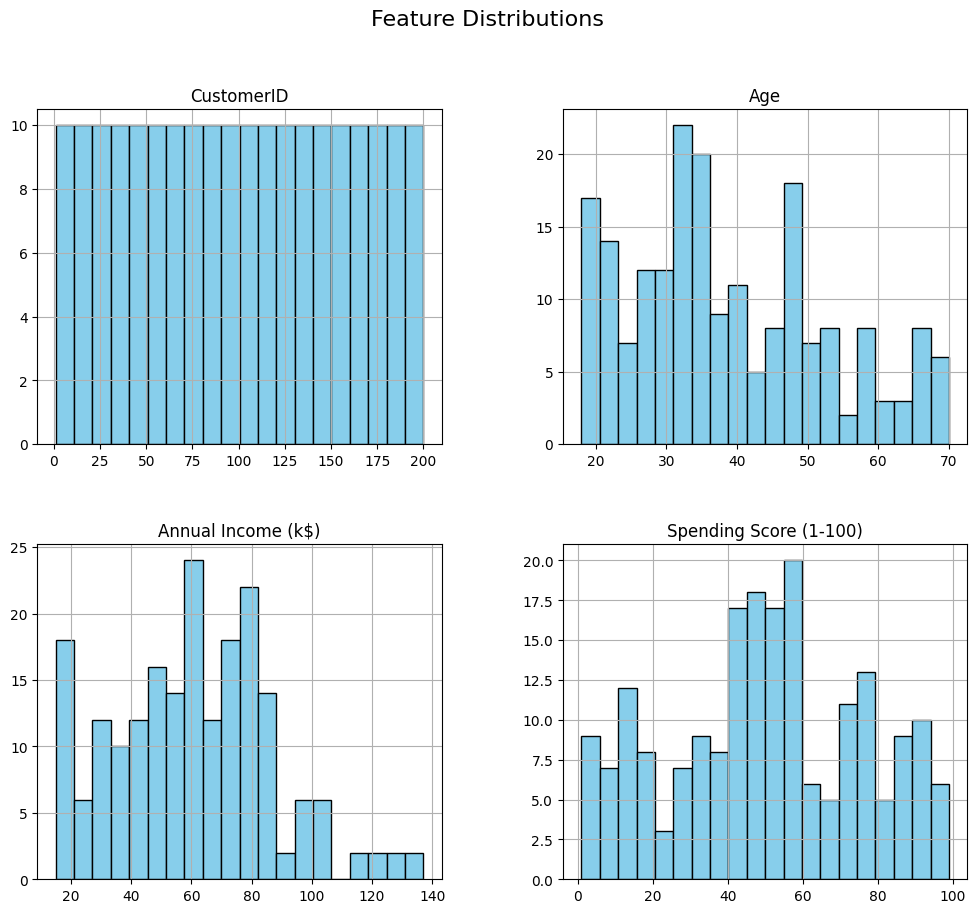

In [12]:
# -------------------- (B) FEATURE DISTRIBUTIONS (HISTOGRAM) --------------------
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [13]:
# -------------------- (C) DATA CLEANING --------------------
# Check for missing values
print("\n🔹 Missing Values in Dataset:\n", df.isnull().sum())

# Fill missing values with column mean (for numerical) or mode (for categorical)
for column in df.columns:
    if df[column].dtype == "object":  # Categorical
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical
        df[column].fillna(df[column].mean(), inplace=True)



🔹 Missing Values in Dataset:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<ipython-input-13-4562722a49e4>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-13-4562722a49e4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [15]:
### **Step 3: Data Cleaning & Transformation** ###
# Convert 'Genre' (Categorical) into Numeric
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])  # Male -> 1, Female -> 0

# Standardization of Numerical Data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Now df_scaled is defined


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
### **Step 4: Data Model Building (Classification Example)** ###
# Define Features (X) and Target (Y)
X = df_scaled.drop(columns=["Spending Score (1-100)"])
y = (df_scaled["Spending Score (1-100)"] > df_scaled["Spending Score (1-100)"].median()).astype(int)  # Binary classification (High or Low Spending)

# Split Data into Train & Test (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.64      0.82      0.72        17

    accuracy                           0.72        40
   macro avg       0.73      0.74      0.72        40
weighted avg       0.75      0.72      0.73        40



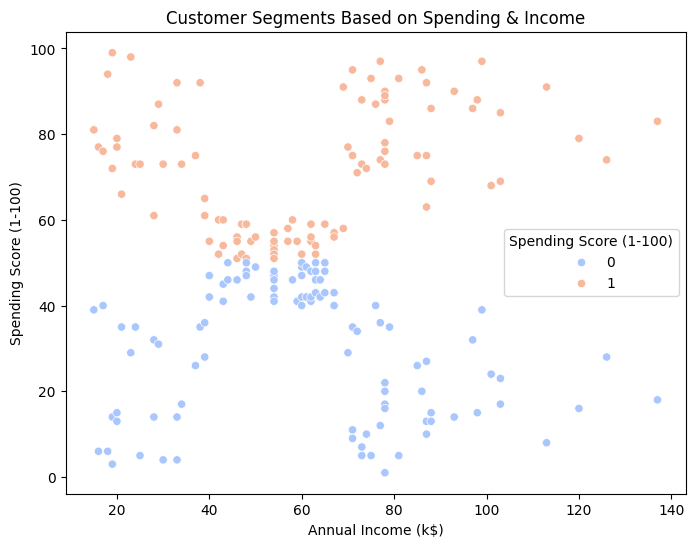

In [19]:
# Scatter Plot of Spending Score vs Income with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=y, palette="coolwarm")
plt.title("Customer Segments Based on Spending & Income")
plt.show()